In [1]:
import pandas as pd
import numpy as np
import sklearn.linear_model as lm
from sklearn.model_selection import KFold
from sklearn import preprocessing as pre
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
import math

In [2]:
housingData = pd.read_csv('./new_housing.csv')
#display(housingData)

#housingData.ocean_proximity.values

print(set(housingData.ocean_proximity.values))
print(len(set(housingData.ocean_proximity.values)))

{'NEAR OCEAN', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY'}
5


In [4]:
housingData['1h_ocean'] = [1 if i=='<1H OCEAN' else 0 for i in housingData.ocean_proximity.values]
housingData['island'] = [1 if i=='ISLAND' else 0 for i in housingData.ocean_proximity.values]
housingData['inland'] = [1 if i=='INLAND' else 0 for i in housingData.ocean_proximity.values]
housingData['near_ocean'] = [1 if i=='NEAR OCEAN' else 0 for i in housingData.ocean_proximity.values]
housingData['near_bay'] = [1 if i=='NEAR BAY' else 0 for i in housingData.ocean_proximity.values]
housingData.drop(columns=['ocean_proximity'], inplace=True)
display(housingData)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,1h_ocean,island,inland,near_ocean,near_bay
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,0,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,0,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,0,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,0,1
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,0,0,0,0,1
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,0,0,0,0,1
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,0,0,0,0,1
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,0,0,0,0,1
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,0,0,0,0,1


In [7]:
train_input = np.c_[housingData['1h_ocean'].values.reshape(-1,1),
                    housingData.island.values.reshape(-1,1),
                    housingData.inland.values.reshape(-1,1),
                    housingData.near_ocean.values.reshape(-1,1),
                    housingData.near_bay.values.reshape(-1,1)]

train_output = housingData.median_house_value.values.reshape(-1,1) 
X_train, X_test, y_train, y_test = train_test_split(train_input, train_output, test_size=0.2, random_state=50)
#print (train_input)
model = lm.LinearRegression()
model.fit(X_train,y_train)
#print (model.score(train_input,train_output))
model.score(X_test,y_test)


0.22850975362121062

In [8]:
for i in housingData.ocean_proximity.values:
    if i=='<1H OCEAN':
        housingData['ocean_proximity'] = 1
    if i=='ISLAND':
        housingData['ocean_proximity'] = 2
    if i=='INLAND':
        housingData['ocean_proximity'] = 3
    if i=='NEAR OCEAN':
        housingData['ocean_proximity'] = 4
    if i=='NEAR BAY':
        housingData['ocean_proximity'] = 5

train_output = housingData.median_house_value.values.reshape(-1,1)        




In [9]:
train_input = housingData.ocean_proximity.values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(train_input, train_output, test_size=0.2, random_state=50)
#print (train_input)
model = lm.LinearRegression()
model.fit(X_train,y_train)
#print (model.score(train_input,train_output))
model.score(X_test,y_test)

-0.00010647503648120171

In [10]:

train_output = housingData.median_house_value.values.reshape(-1,1)
print(train_output)
housingData.drop(columns=['median_house_value','ocean_proximity'], inplace=True)
#display(housingData)


[[452600.]
 [358500.]
 [352100.]
 ...
 [ 92300.]
 [ 84700.]
 [ 89400.]]


In [3]:



Score=[]

list_columns = housingData.columns.values

model = lm.LinearRegression()

for key in list_columns:
    train_input = housingData[key].values.reshape(-1,1)
    X_train, X_test, y_train, y_test = train_test_split(train_input, train_output, test_size=0.2, random_state=50)
    #print (train_input)
    model.fit(X_train,y_train)
    #print (model.score(train_input,train_output))
    Score.append(model.score(X_test,y_test))
    
Score_poly1 = np.array(Score)

Score_poly1

array([ 2.96932349e-03,  1.70146675e-02,  1.01814961e-02,  1.67207997e-02,
        2.52485258e-03, -1.48959778e-04,  4.20789824e-03,  4.69082180e-01])

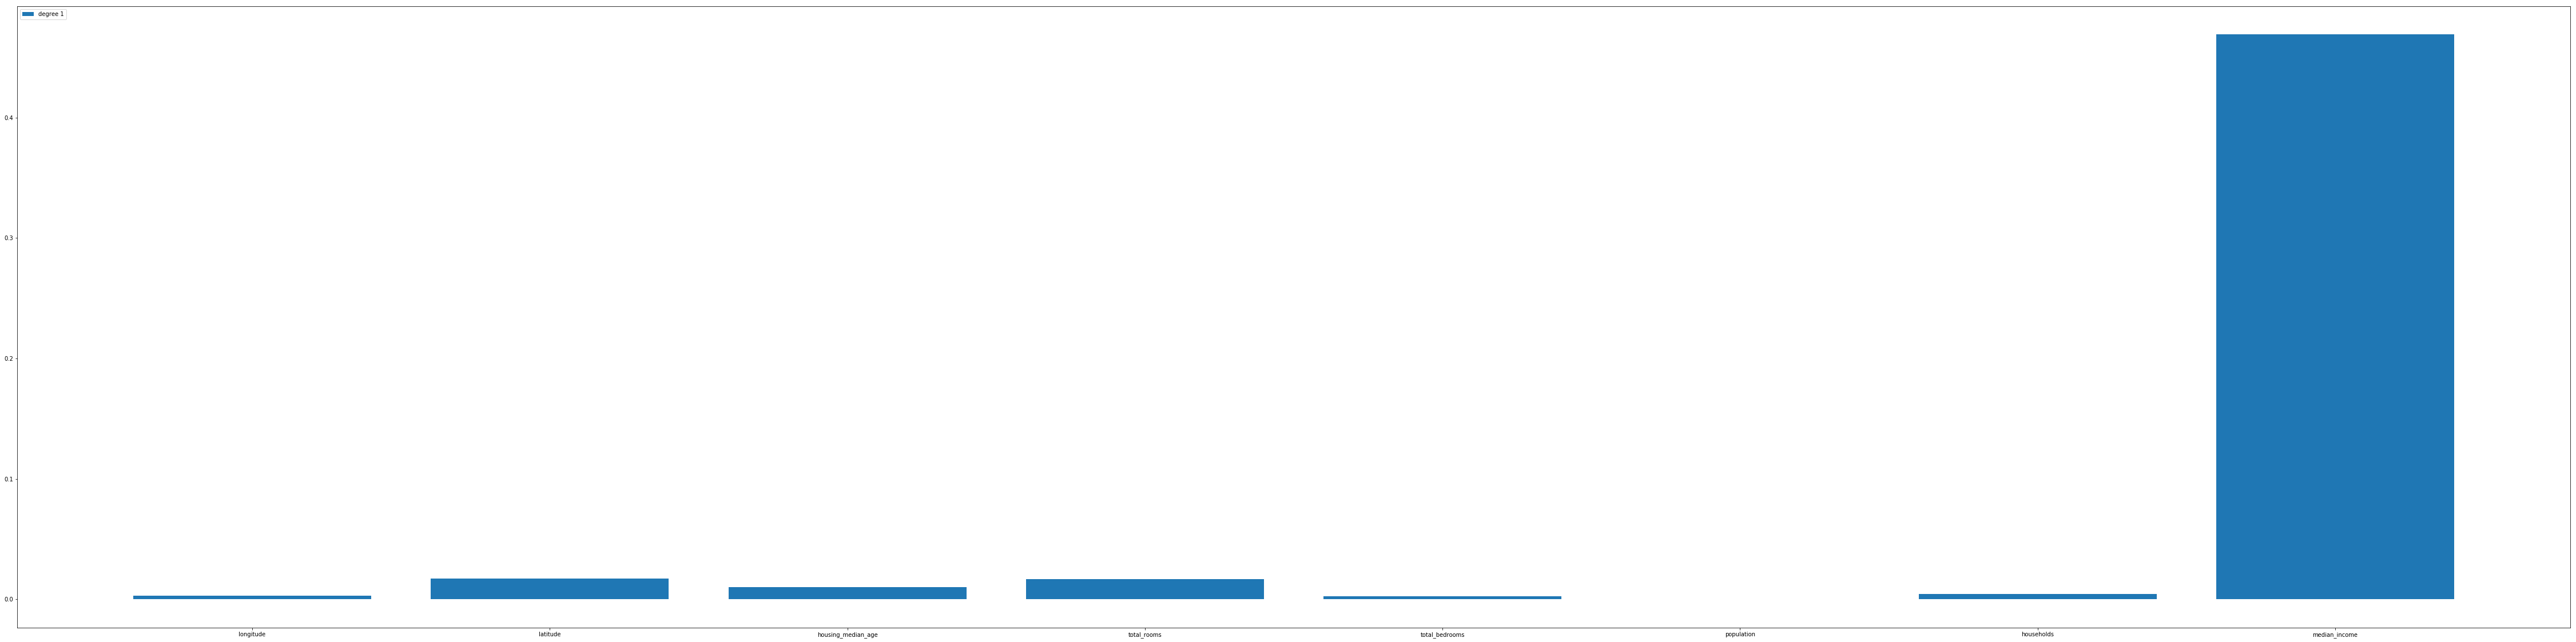

In [28]:

plt.figure(figsize = (80,20))
plt.bar(list_columns,Score_poly1,label='degree 1') 
plt.legend(loc='upper left')
plt.show()


In [9]:
#degreee 2 

Score.clear()
poly2 = PolynomialFeatures(degree=2)
model_poly2 = lm.LinearRegression()
for key in list_columns:
    train_input = housingData[key].values.reshape(-1,1)
    X_train, X_test, y_train, y_test = train_test_split(train_input, train_output, test_size=0.2, random_state=50)
    #print (train_input)
    
    X_train_poly2 = poly2.fit_transform(X_train)
    X_test_poly2 = poly2.fit_transform(X_test)
    
    
    model_poly2.fit(X_train_poly2,y_train)
    #print (model.score(train_input,train_output))
    Score.append(model_poly2.score(X_test_poly2,y_test))
    
    
Score_poly2 = np.array(Score)
Score_poly2


array([3.72961106e-03, 4.58974209e-02, 1.50881023e-02, 2.49278483e-02,
       3.43048040e-03, 9.25190135e-05, 6.05493010e-03, 4.69328357e-01])

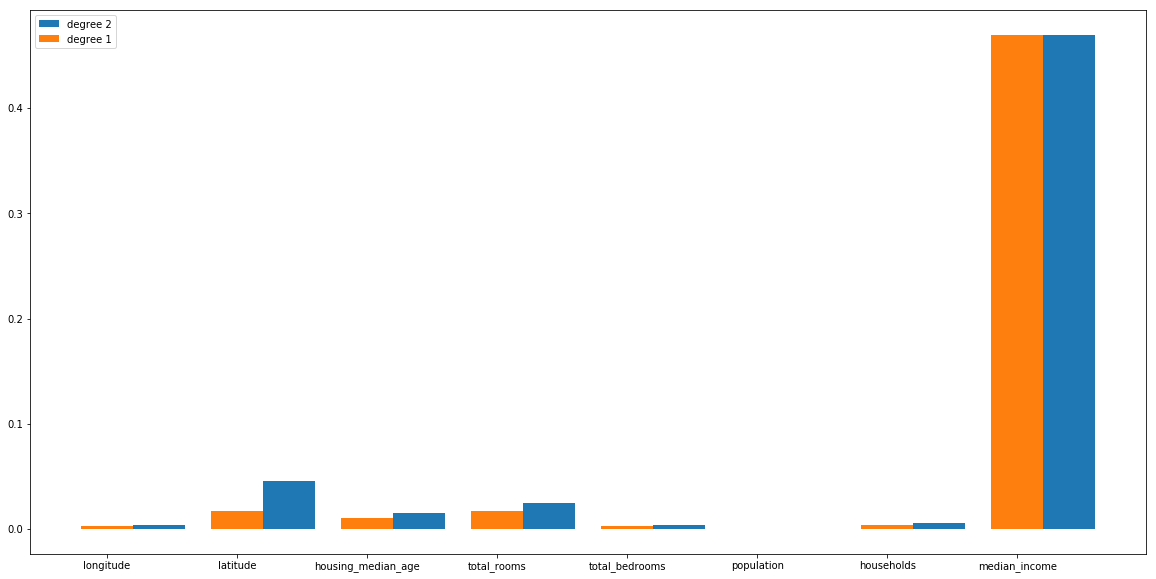

In [12]:
size = 8
step = np.arange(size)
total_width, n = 0.8, 2
width = total_width / n
step = step - (total_width - width) / 2

plt.figure(figsize = (20,10))
plt.bar(step+width,Score_poly2,width=width,label='degree 2') 
plt.bar(step,Score_poly1,width=width,label='degree 1',tick_label = list_columns) 
plt.legend(loc='upper left')
plt.show()

In [18]:
#degreee 3 

Score.clear()
poly3 = PolynomialFeatures(degree=3)
model_poly3 = lm.LinearRegression()
for key in list_columns:
    train_input = housingData[key].values.reshape(-1,1)
    X_train, X_test, y_train, y_test = train_test_split(train_input, train_output, test_size=0.2, random_state=50)
    #print (train_input)
    
    X_train_poly3 = poly3.fit_transform(X_train)
    X_test_poly3 = poly3.fit_transform(X_test)
    
    
    model_poly3.fit(X_train_poly3,y_train)
    #print (model.score(train_input,train_output))
    Score.append(model_poly3.score(X_test_poly3,y_test))
    
    
Score_poly3 = np.array(Score)
Score_poly3

array([0.01751603, 0.04735792, 0.01537336, 0.02926004, 0.00360974,
       0.00106397, 0.00663925, 0.47715335])

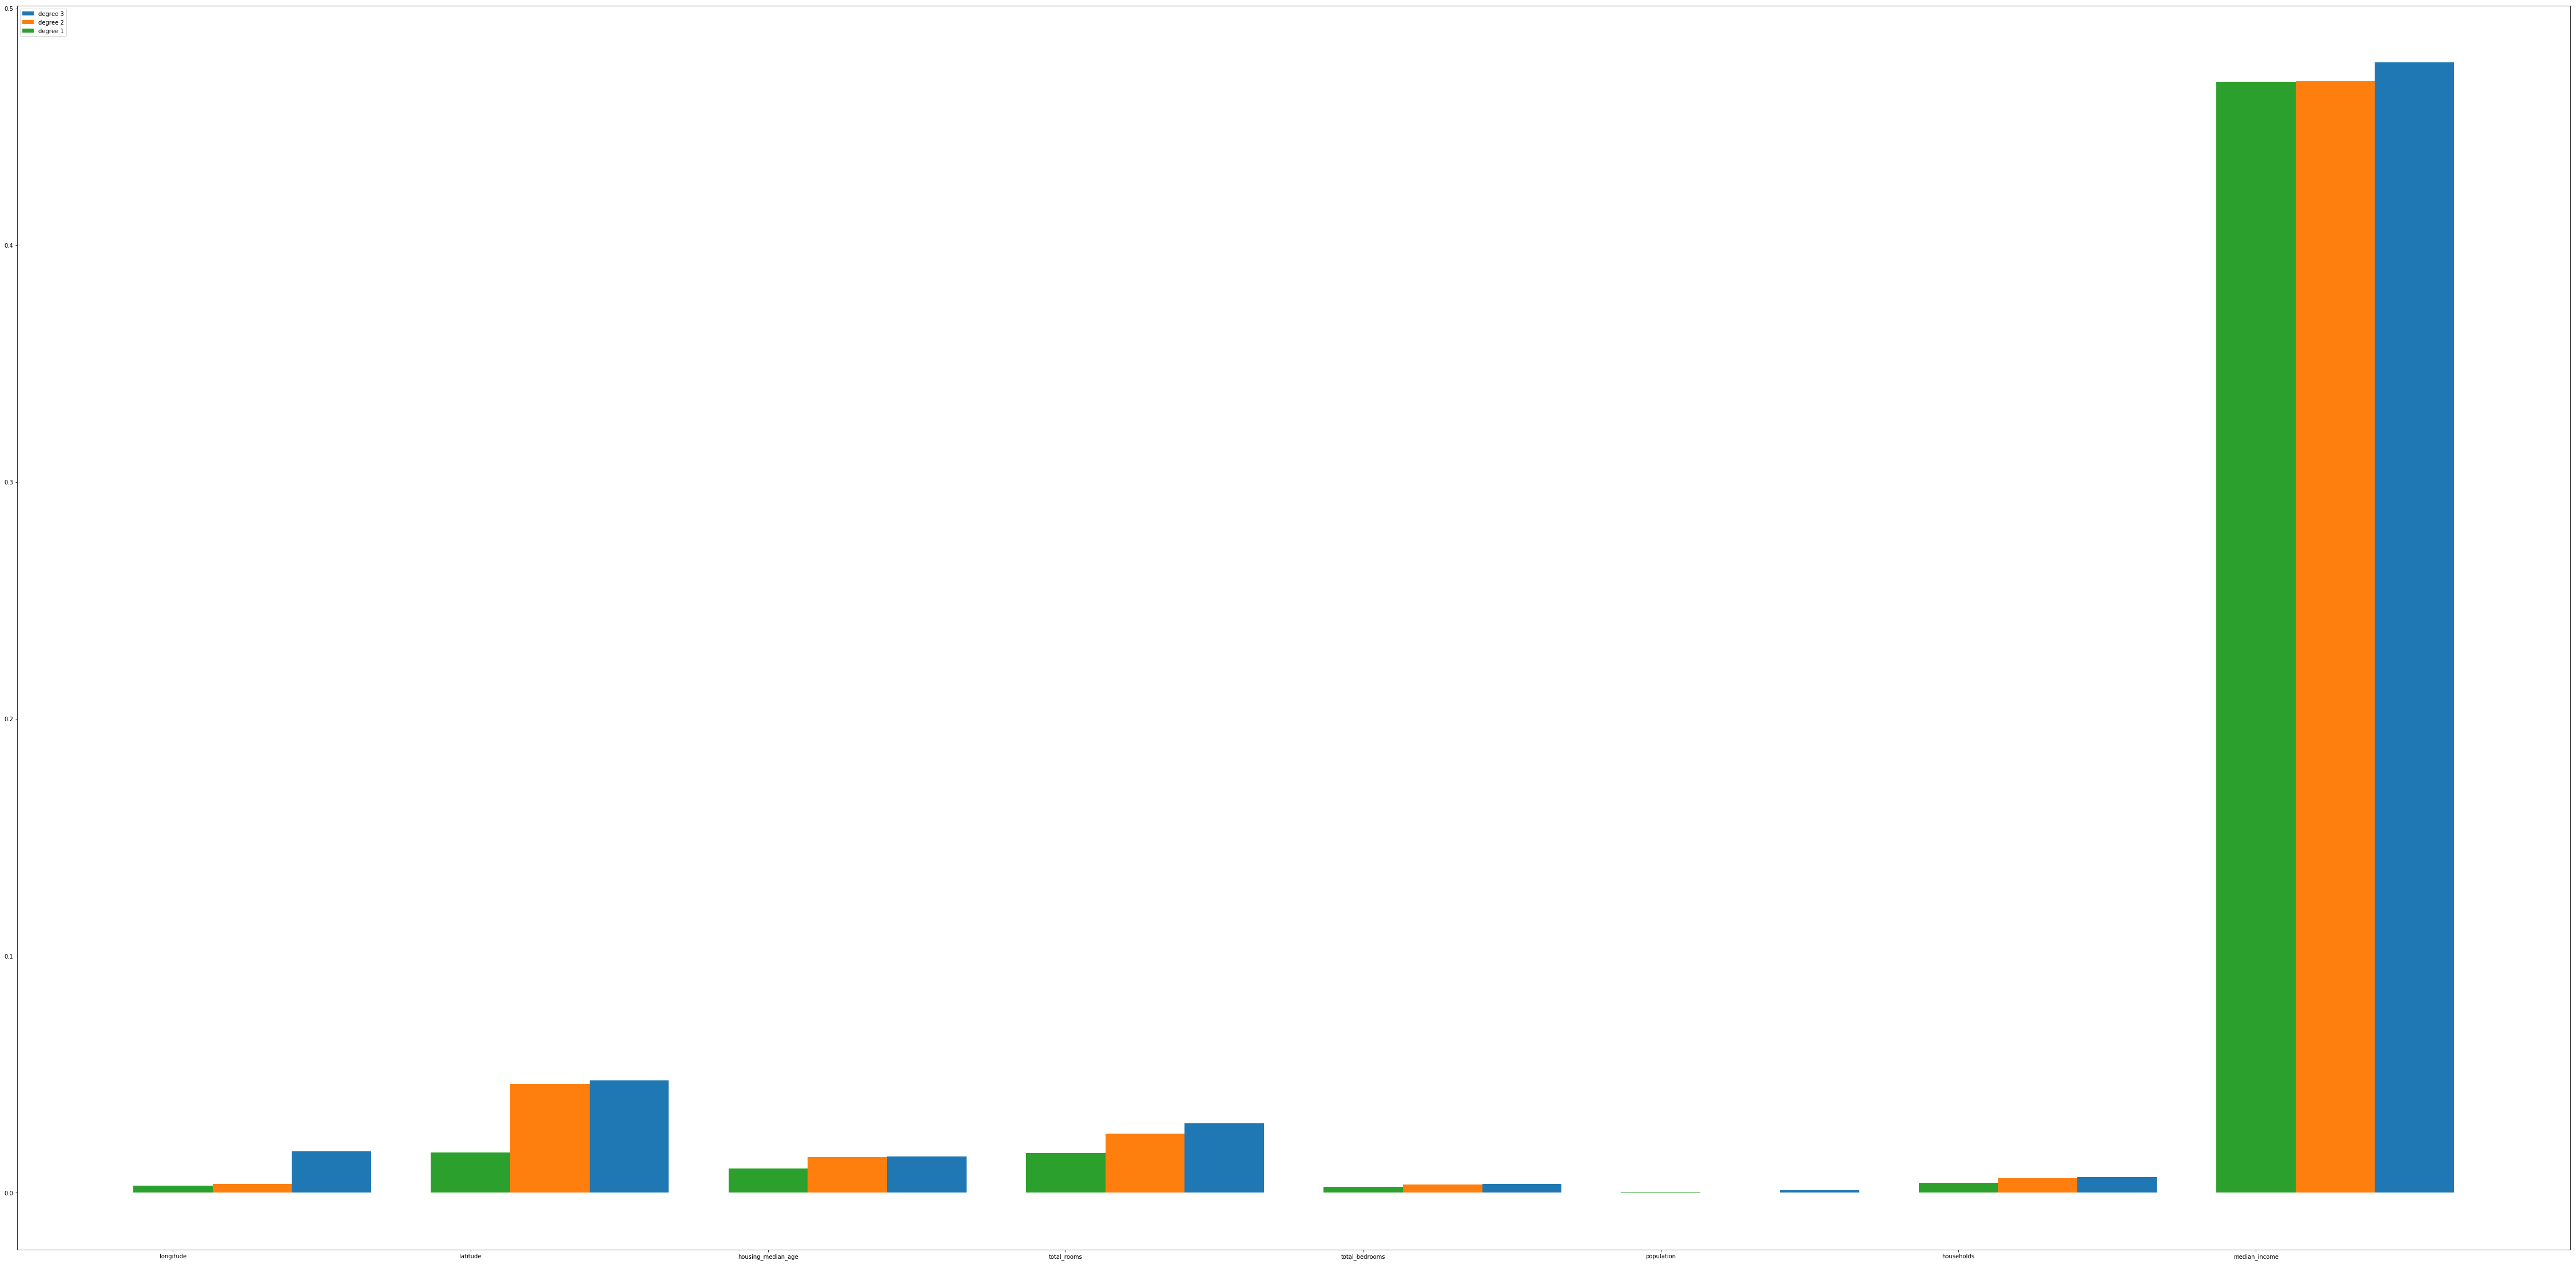

In [32]:
size = 8
step = np.arange(size)
total_width, n = 0.8, 3
width = total_width / n
step = step - (total_width - width) / 2

plt.figure(figsize = (80,40))
plt.bar(step+ 2*width,Score_poly3,width=width,label='degree 3') 
plt.bar(step+width,Score_poly2,width=width,label='degree 2') 
plt.bar(step,Score_poly1,width=width,label='degree 1',tick_label = list_columns) 
plt.legend(loc='upper left')
plt.show()

In [20]:
#degreee 4 

Score.clear()
poly4 = PolynomialFeatures(degree=4)
model_poly4= lm.LinearRegression()
for key in list_columns:
    train_input = housingData[key].values.reshape(-1,1)
    X_train, X_test, y_train, y_test = train_test_split(train_input, train_output, test_size=0.2, random_state=50)
    #print (train_input)
    
    X_train_poly4 = poly4.fit_transform(X_train)
    X_test_poly4 = poly4.fit_transform(X_test)
    
    
    model_poly4.fit(X_train_poly4,y_train)
    #print (model.score(train_input,train_output))
    Score.append(model_poly4.score(X_test_poly4,y_test))
    
    
Score_poly4 = np.array(Score)
Score_poly4

array([0.05067039, 0.04768145, 0.02486851, 0.03169964, 0.00366147,
       0.00098197, 0.00675709, 0.47674268])

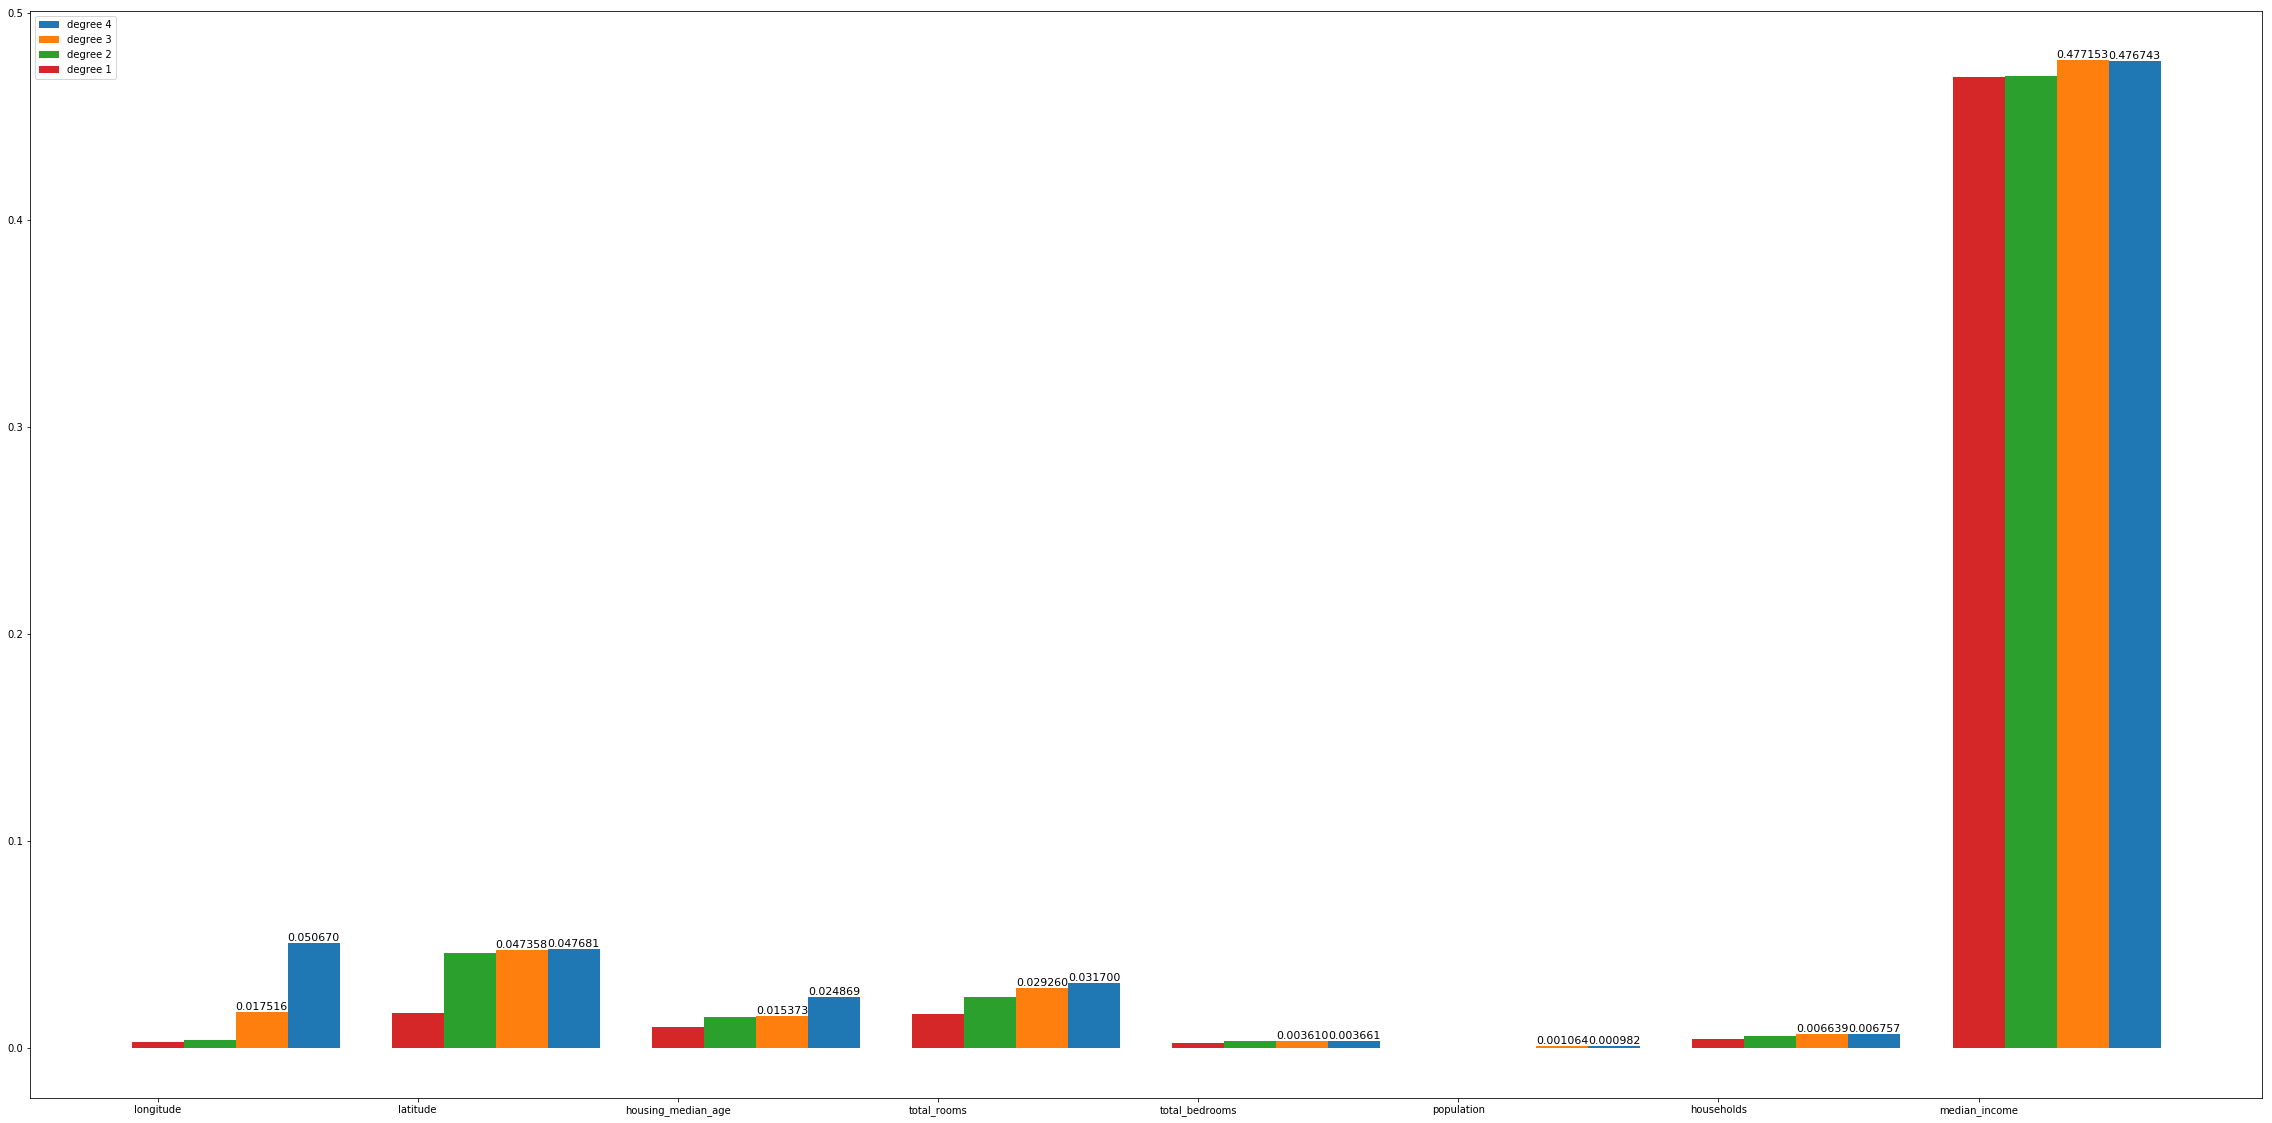

In [40]:
size = 8
step = np.arange(size)
total_width, n = 0.8, 4
width = total_width / n
step = step - (total_width - width) / 2

plt.figure(figsize = (40,20))
plt.bar(step+ 3*width,Score_poly4,width=width,label='degree 4') 
plt.bar(step+ 2*width,Score_poly3,width=width,label='degree 3') 
plt.bar(step+width,Score_poly2,width=width,label='degree 2') 
plt.bar(step,Score_poly1,width=width,label='degree 1',tick_label = list_columns) 
for a,b in zip(step+ 3*width,Score_poly4):  
     plt.text(a, b, '%f' % b, ha='center', va= 'bottom',fontsize=11)
for a,b in zip(step+ 2*width,Score_poly3):  
     plt.text(a, b, '%f' % b, ha='center', va= 'bottom',fontsize=11)

plt.legend(loc='upper left')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'ocean_proximity'